In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.rcParams["font.family"] = "SF Compact Text"
font_scale = 2
sns.set(font_scale=font_scale, font="SF Compact Text")


In [6]:
df = pd.read_csv("experiment1_results.csv")

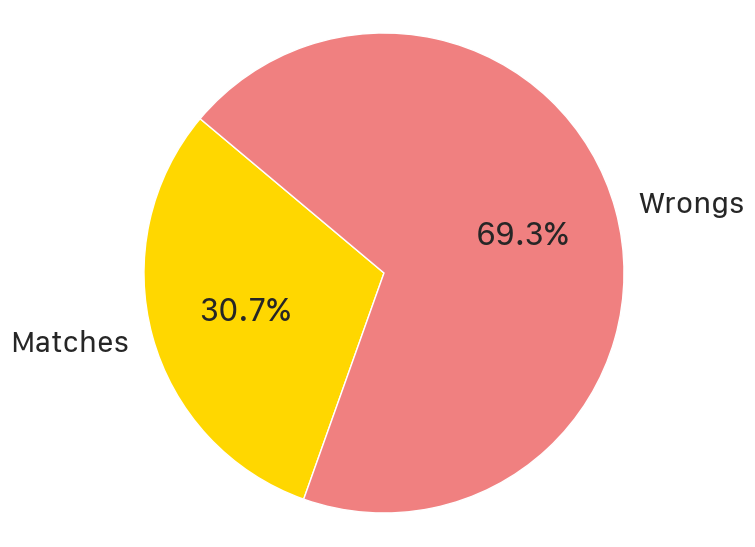

In [9]:
# Assuming 'cost' and 'predicted_cost' are columns in your DataFrame
cost_values = df["cost"]
predicted_cost_values = df["predicted_cost"]

# Calculate the counts for different relationships between cost and predicted_cost
matches = sum(cost_values == predicted_cost_values)
underestimations = sum(cost_values != predicted_cost_values)

# Pie chart data and labels
labels = ["Matches", "Wrongs"]
sizes = [matches, underestimations]
colors = ["gold", "lightcoral"]

# Plotting the pie chart using Matplotlib with Seaborn's style
sns.set(font_scale=2, style="whitegrid", font="SF Compact Text")
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Apply tight layout
plt.savefig("cost_predicted_cost_pie.png", dpi=300)  # Export the plot
plt.show()

/var/folders/7l/8dt2fvys1b75lrc4gj_0dfb40000gn/T/ipykernel_89632/2830556932.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_error = df.groupby("cost_bins")["error"].mean().reset_index()
/var/folders/7l/8dt2fvys1b75lrc4gj_0dfb40000gn/T/ipykernel_89632/2830556932.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cost_bins", y="error", data=average_error, palette="viridis")


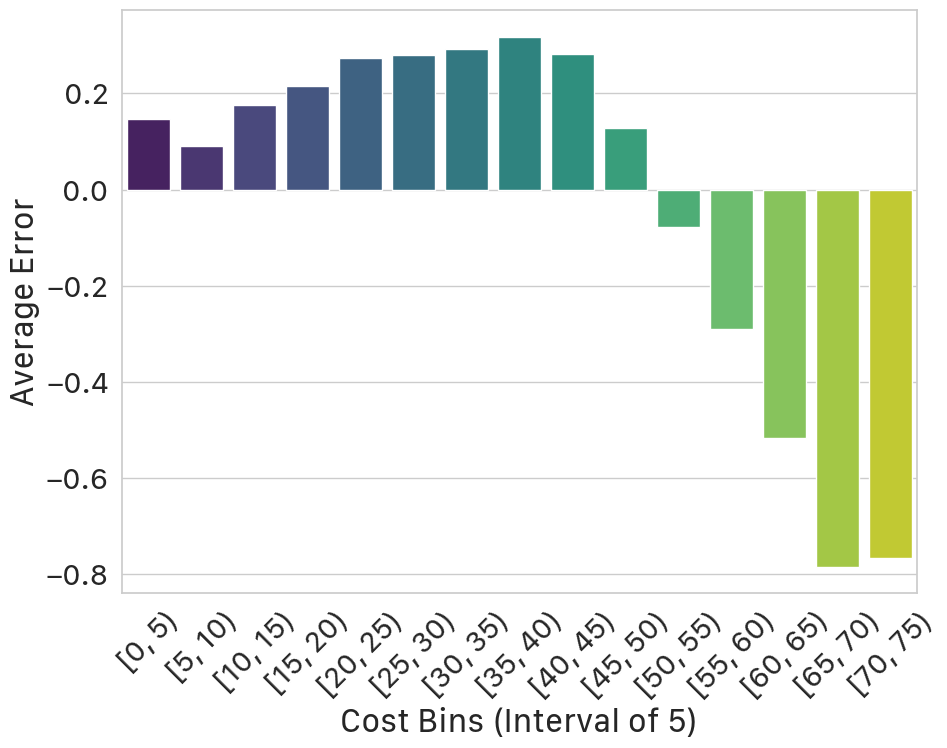

In [14]:
# Assuming 'cost' and 'predicted_cost' are columns in your DataFrame
bins = pd.cut(df["cost"], bins=range(0, max(df["cost"]) + 6, 5), right=False)
df["cost_bins"] = bins

# Calculating the error between 'cost' and 'predicted_cost'
df["error"] = df["predicted_cost"] - df["cost"]

# Grouping by 'cost_bins' and calculating average error for each bin
average_error = df.groupby("cost_bins")["error"].mean().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="cost_bins", y="error", data=average_error, palette="viridis")
plt.xlabel("Cost Bins (Interval of 5)")
plt.ylabel("Average Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("average_error.png", dpi=300)  # Export the plot

plt.show()